# Preamble

In [1]:
#start by importing some needed modules
#You may see some warnings... unless it spits out an error, you can ignore them!
import tangos as db
import numpy as np
import pynbody
import matplotlib.pyplot as plt
from array import array
import pickle
import statistics as st
plt.ion()

#Set up some properties to make the plots look nice
plt.rcParams['figure.figsize'] = (12, 9) #set figure size
plt.rcParams['font.size'] = 20 #set font size so things are readible and not too small or bit
plt.rcParams['font.family'] = 'sans-serif' # just a font preference here
plt.rcParams['xtick.major.size'] = 10 #size and widths of major/minor tick marks on plots
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1


#load in the database simulation (also a good check that you are reading the right database file!)
sim = db.get_simulation('cosmo25')

In [2]:
##getting the last time step
step = db.get_timestep('cosmo25/%8192')

In [3]:
solar_metal = 0.0134

# Data

In [4]:
f = open('./Data/stellar_metal_BH.pkl', 'rb')
stellar_metal_BH_data = pickle.load(f)
f.close

f = open('./Data/gas_metal_BH.pkl', 'rb')
gas_metal_BH_data = pickle.load(f)
f.close()

f = open('./Data/stellar_metal.pkl', 'rb')
stellar_metal_data = pickle.load(f)
f.close()

f = open('./Data/gas_metal.pkl', 'rb')
gas_metal_data = pickle.load(f)
f.close()

f = open('./Data/gas_metal_prof_cut.pkl', 'rb')
gas_metal_prof_cut_data = pickle.load(f)
f.close()

f = open('./Data/stellar_SFR_data.pkl', 'rb')
SFR_data = pickle.load(f)
f.close()

f = open('./Data/SFR_data.pkl', 'rb')
saved_SFR_data = pickle.load(f)
f.close()

# Main

In [5]:
all_halo_numbers = np.array(gas_metal_data['halo_number'])
halo_with_BH = np.unique(step.calculate_all('host_halo.halo_number()')[0])

BH_halo_ind = np.where(np.in1d(all_halo_numbers, halo_with_BH))
halo_no_BH_ind = np.where(np.in1d(all_halo_numbers, halo_with_BH, invert = True))

In [6]:
BH_gas_metal = gas_metal_BH_data['BH_gas_metal']
BH_stellar_metal = stellar_metal_BH_data['BH_stellar_metal']

stellar_metal_all = stellar_metal_data['tot_stellar_metal']
gas_metal_all = gas_metal_data['tot_gas_mass']

no_BH_stellar_metal = stellar_metal_all[halo_no_BH_ind]
no_BH_gas_metal = stellar_metal_all[halo_no_BH_ind]

In [7]:
stellar_mass = stellar_metal_data['tot_stellar_mass']

In [8]:
with_BH = all_halo_numbers[BH_halo_ind]
no_BH = all_halo_numbers[halo_no_BH_ind]

In [9]:
Mstar_all, halo_num = step.calculate_all('Mstar', 'halo_number()')

## Control

In [10]:
star_ind_6 = np.where(stellar_mass <= 1e6)
star_ind_7 = np.where((stellar_mass <= 1e7) & (stellar_mass >= 1e6))
star_ind_8 = np.where((stellar_mass <= 1e8) & (stellar_mass >= 1e7))
star_ind_9 = np.where((stellar_mass <= 1e9) & (stellar_mass >= 1e8))
star_ind_10 = np.where((stellar_mass <= 1e10) & (stellar_mass >= 1e9))
star_ind_11 = np.where((stellar_mass <= 1e11) & (stellar_mass >= 1e10))
star_ind_12 = np.where((stellar_mass <= 1e12) & (stellar_mass >= 1e11))

In [11]:
stellar_mass_6 = stellar_mass[star_ind_6]
stellar_mass_7 = stellar_mass[star_ind_7]
stellar_mass_8 = stellar_mass[star_ind_8]
stellar_mass_9 = stellar_mass[star_ind_9]
stellar_mass_10 = stellar_mass[star_ind_10]
stellar_mass_11 = stellar_mass[star_ind_11]
stellar_mass_12 = stellar_mass[star_ind_12]

stellar_mass_cut = []
stellar_mass_cut = np.append(stellar_mass_cut, stellar_mass_6)
stellar_mass_cut = np.append(stellar_mass_cut, stellar_mass_7)
stellar_mass_cut = np.append(stellar_mass_cut, stellar_mass_8)
stellar_mass_cut = np.append(stellar_mass_cut, stellar_mass_9)
stellar_mass_cut = np.append(stellar_mass_cut, stellar_mass_10)
stellar_mass_cut = np.append(stellar_mass_cut, stellar_mass_11)
stellar_mass_cut = np.append(stellar_mass_cut, stellar_mass_12)

In [12]:
star_mass_med_6 = np.median(stellar_mass_6)
star_mass_med_7 = np.median(stellar_mass_7)
star_mass_med_8 = np.median(stellar_mass_8)
star_mass_med_9 = np.median(stellar_mass_9)
star_mass_med_10 = np.median(stellar_mass_10)
star_mass_med_11 = np.median(stellar_mass_11)
star_mass_med_12 = np.median(stellar_mass_12)

star_mass_med = []
star_mass_med = np.append(star_mass_med, star_mass_med_6)
star_mass_med = np.append(star_mass_med, star_mass_med_7)
star_mass_med = np.append(star_mass_med, star_mass_med_8)
star_mass_med = np.append(star_mass_med, star_mass_med_9)
star_mass_med = np.append(star_mass_med, star_mass_med_10)
star_mass_med = np.append(star_mass_med, star_mass_med_11)
star_mass_med = np.append(star_mass_med, star_mass_med_12)

## Stars

In [13]:
stellar_metal_6 = stellar_metal_all[star_ind_6]
stellar_metal_7 = stellar_metal_all[star_ind_7]
stellar_metal_8 = stellar_metal_all[star_ind_8]
stellar_metal_9 = stellar_metal_all[star_ind_9]
stellar_metal_10 = stellar_metal_all[star_ind_10]
stellar_metal_11 = stellar_metal_all[star_ind_11]
stellar_metal_12 = stellar_metal_all[star_ind_12]

stellar_metal_cut = []
stellar_metal_cut = np.append(stellar_metal_cut, stellar_metal_6)
stellar_metal_cut = np.append(stellar_metal_cut, stellar_metal_7)
stellar_metal_cut = np.append(stellar_metal_cut, stellar_metal_8)
stellar_metal_cut = np.append(stellar_metal_cut, stellar_metal_9)
stellar_metal_cut = np.append(stellar_metal_cut, stellar_metal_10)
stellar_metal_cut = np.append(stellar_metal_cut, stellar_metal_11)
stellar_metal_cut = np.append(stellar_metal_cut, stellar_metal_12)

In [14]:
star_met_med_6 = np.median(stellar_metal_6)
star_met_med_7 = np.median(stellar_metal_7)
star_met_med_8 = np.median(stellar_metal_8)
star_met_med_9 = np.median(stellar_metal_9)
star_met_med_10 = np.median(stellar_metal_10)
star_met_med_11 = np.median(stellar_metal_11)
star_met_med_12 = np.median(stellar_metal_12)

stellar_median = [] 
stellar_median = np.append(stellar_median, star_met_med_6)
stellar_median = np.append(stellar_median, star_met_med_7)
stellar_median = np.append(stellar_median, star_met_med_8)
stellar_median = np.append(stellar_median, star_met_med_9)
stellar_median = np.append(stellar_median, star_met_med_10)
stellar_median = np.append(stellar_median, star_met_med_11)
stellar_median = np.append(stellar_median, star_met_med_12)

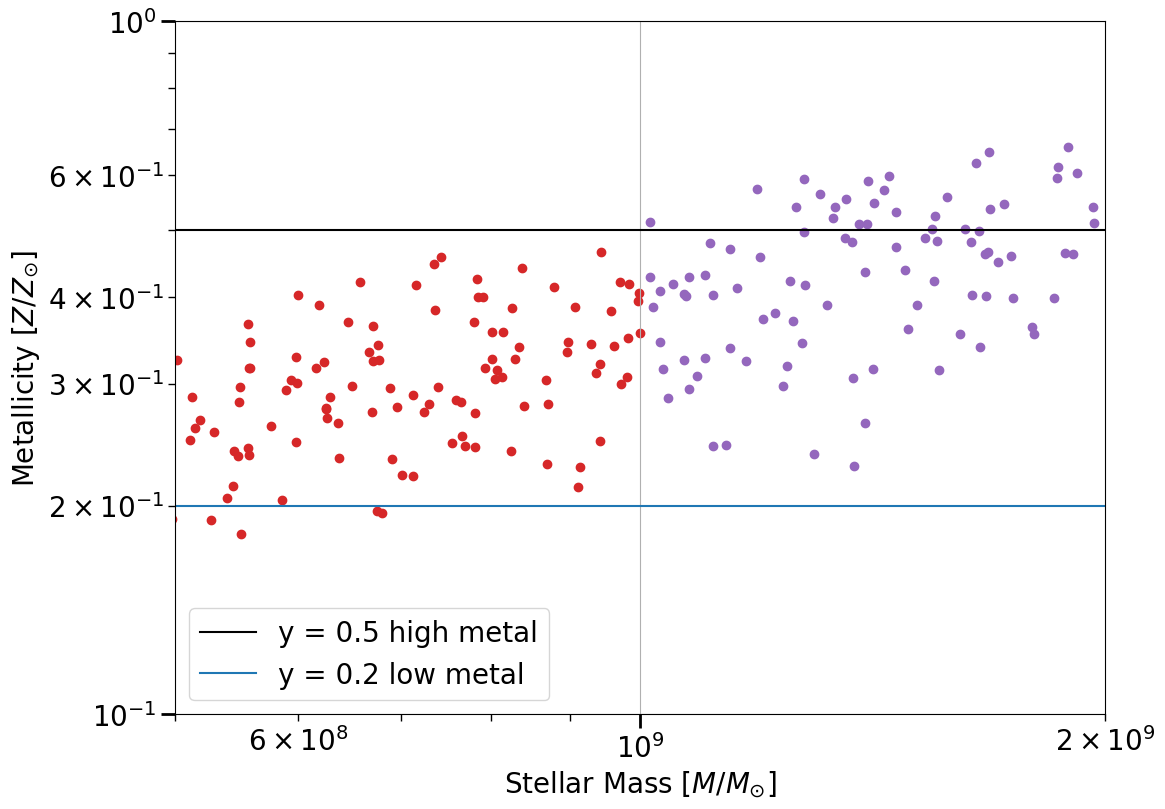

In [86]:
plt.scatter(stellar_mass_6, stellar_metal_6/solar_metal)
plt.scatter(stellar_mass_7, stellar_metal_7/solar_metal)
plt.scatter(stellar_mass_8, stellar_metal_8/solar_metal)
plt.scatter(stellar_mass_9, stellar_metal_9/solar_metal)
plt.scatter(stellar_mass_10, stellar_metal_10/solar_metal)
plt.scatter(stellar_mass_11, stellar_metal_11/solar_metal)
plt.scatter(stellar_mass_12, stellar_metal_12/solar_metal)

#plt.scatter(stellar_mass_cut, stellar_metal_cut/solar_metal)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('Metallicity $[Z/Z_{\odot}]$')

#plt.xlim(1e5, 1e12)
plt.ylim(1e-1, 1e0)
plt.xlim([5e8, 2e9])

plt.axhline(y = 0.5, color = 'black', label = "y = 0.5 high metal")
plt.axhline(y = 0.2, label = "y = 0.2 low metal" )

plt.legend(loc = "lower left")
plt.grid()
#plt.show()
plt.savefig("./Pictures/Stellar_Mass_zoom_1.png", bbox_inches='tight') 

In [16]:
BH_star_ind_high_6 = np.where(BH_stellar_metal >= star_met_med_6)
BH_star_ind_high_7 = np.where(BH_stellar_metal >= star_met_med_7)
BH_star_ind_high_8 = np.where(BH_stellar_metal >= star_met_med_8)
BH_star_ind_high_9 = np.where(BH_stellar_metal >= star_met_med_9)
BH_star_ind_high_10 = np.where(BH_stellar_metal >= star_met_med_10)
BH_star_ind_high_11 = np.where(BH_stellar_metal >= star_met_med_11)
BH_star_ind_high_12 = np.where(BH_stellar_metal >= star_met_med_12)

BH_star_met_high_6 = BH_stellar_metal[BH_star_ind_high_6]
BH_star_met_high_7 = BH_stellar_metal[BH_star_ind_high_7]
BH_star_met_high_8 = BH_stellar_metal[BH_star_ind_high_8]
BH_star_met_high_9 = BH_stellar_metal[BH_star_ind_high_9]
BH_star_met_high_10 = BH_stellar_metal[BH_star_ind_high_10]
BH_star_met_high_11 = BH_stellar_metal[BH_star_ind_high_11]
BH_star_met_high_12 = BH_stellar_metal[BH_star_ind_high_12]

In [17]:
BH_star_met_high = []
BH_star_met_high = np.append(BH_star_met_high, BH_star_met_high_6)
BH_star_met_high = np.append(BH_star_met_high, BH_star_met_high_7)
BH_star_met_high = np.append(BH_star_met_high, BH_star_met_high_8)
BH_star_met_high = np.append(BH_star_met_high, BH_star_met_high_9)
BH_star_met_high = np.append(BH_star_met_high, BH_star_met_high_10)
BH_star_met_high = np.append(BH_star_met_high, BH_star_met_high_11)
BH_star_met_high = np.append(BH_star_met_high, BH_star_met_high_12)

In [18]:
BH_star_high_med_6 = np.median(BH_star_met_high_6)
BH_star_high_med_7 = np.median(BH_star_met_high_7)
BH_star_high_med_8 = np.median(BH_star_met_high_8)
BH_star_high_med_9 = np.median(BH_star_met_high_9)
BH_star_high_med_10 = np.median(BH_star_met_high_10)
BH_star_high_med_11 = np.median(BH_star_met_high_11)
BH_star_high_med_12 = np.median(BH_star_met_high_12)

BH_star_med_high = []
BH_star_med_high = np.append(BH_star_med_high, BH_star_high_med_6)
BH_star_med_high = np.append(BH_star_med_high, BH_star_high_med_7)
BH_star_med_high = np.append(BH_star_med_high, BH_star_high_med_8)
BH_star_med_high = np.append(BH_star_med_high, BH_star_high_med_9)
BH_star_med_high = np.append(BH_star_med_high, BH_star_high_med_10)
BH_star_med_high = np.append(BH_star_med_high, BH_star_high_med_11)
BH_star_med_high = np.append(BH_star_med_high, BH_star_high_med_12)

In [19]:
BH_star_ind_low_6 = np.where(BH_stellar_metal <= star_met_med_6)
BH_star_ind_low_7 = np.where(BH_stellar_metal <= star_met_med_7)
BH_star_ind_low_8 = np.where(BH_stellar_metal <= star_met_med_8)
BH_star_ind_low_9 = np.where(BH_stellar_metal <= star_met_med_9)
BH_star_ind_low_10 = np.where(BH_stellar_metal <= star_met_med_10)
BH_star_ind_low_11 = np.where(BH_stellar_metal <= star_met_med_11)
BH_star_ind_low_12 = np.where(BH_stellar_metal <= star_met_med_12)

BH_star_met_low_6 = BH_stellar_metal[BH_star_ind_low_6]
BH_star_met_low_7 = BH_stellar_metal[BH_star_ind_low_7]
BH_star_met_low_8 = BH_stellar_metal[BH_star_ind_low_8]
BH_star_met_low_9 = BH_stellar_metal[BH_star_ind_low_9]
BH_star_met_low_10 = BH_stellar_metal[BH_star_ind_low_10]
BH_star_met_low_11 = BH_stellar_metal[BH_star_ind_low_11]
BH_star_met_low_12 = BH_stellar_metal[BH_star_ind_low_12]

In [20]:
BH_star_met_low = []
BH_star_met_low = np.append(BH_star_met_low, BH_star_met_low_6)
BH_star_met_low = np.append(BH_star_met_low, BH_star_met_low_7)
BH_star_met_low = np.append(BH_star_met_low, BH_star_met_low_8)
BH_star_met_low = np.append(BH_star_met_low, BH_star_met_low_9)
BH_star_met_low = np.append(BH_star_met_low, BH_star_met_low_10)
BH_star_met_low = np.append(BH_star_met_low, BH_star_met_low_11)
BH_star_met_low = np.append(BH_star_met_low, BH_star_met_low_12)

In [21]:
BH_num_low_6 = with_BH[BH_star_ind_low_6]
BH_num_low_7 = with_BH[BH_star_ind_low_7]
BH_num_low_8 = with_BH[BH_star_ind_low_8]
BH_num_low_9 = with_BH[BH_star_ind_low_9]
BH_num_low_10 = with_BH[BH_star_ind_low_10]
BH_num_low_11 = with_BH[BH_star_ind_low_11]
BH_num_low_12 = with_BH[BH_star_ind_low_12]

In [22]:
BH_num_low_tot = []
BH_num_low_tot = np.append(BH_num_low_tot, BH_num_low_6)
BH_num_low_tot = np.append(BH_num_low_tot, BH_num_low_7)
BH_num_low_tot = np.append(BH_num_low_tot, BH_num_low_8)
BH_num_low_tot = np.append(BH_num_low_tot, BH_num_low_9)
BH_num_low_tot = np.append(BH_num_low_tot, BH_num_low_10)
BH_num_low_tot = np.append(BH_num_low_tot, BH_num_low_11)
BH_num_low_tot = np.append(BH_num_low_tot, BH_num_low_12)

BH_num_low_tot = np.unique(BH_num_low_tot)

In [23]:
BH_num_low_tot = BH_num_low_tot.astype(int)

In [24]:
SFR_master = saved_SFR_data['SFR_master']

In [25]:
SFR_BH_low = SFR_master[BH_num_low_tot - 1]
Mstar_BH_low = Mstar_all[BH_num_low_tot - 1]

In [26]:
BH_star_low_med_6 = np.median(BH_star_met_low_6)
BH_star_low_med_7 = np.median(BH_star_met_low_7)
BH_star_low_med_8 = np.median(BH_star_met_low_8)
BH_star_low_med_9 = np.median(BH_star_met_low_9)
BH_star_low_med_10 = np.median(BH_star_met_low_10)
BH_star_low_med_12 = np.median(BH_star_met_low_11)
BH_star_low_med_11 = np.median(BH_star_met_low_12)


BH_star_med_low = []
BH_star_med_low = np.append(BH_star_med_low, BH_star_low_med_6)
BH_star_med_low = np.append(BH_star_med_low, BH_star_low_med_7)
BH_star_med_low = np.append(BH_star_med_low, BH_star_low_med_8)
BH_star_med_low = np.append(BH_star_med_low, BH_star_low_med_9)
BH_star_med_low = np.append(BH_star_med_low, BH_star_low_med_10)
BH_star_med_low = np.append(BH_star_med_low, BH_star_low_med_11)
BH_star_med_low = np.append(BH_star_med_low, BH_star_low_med_12)

In [27]:
no_BH_star_ind_high_6 = np.where(no_BH_stellar_metal >= star_met_med_6)
no_BH_star_ind_high_7 = np.where(no_BH_stellar_metal >= star_met_med_7)
no_BH_star_ind_high_8 = np.where(no_BH_stellar_metal >= star_met_med_8)
no_BH_star_ind_high_9 = np.where(no_BH_stellar_metal >= star_met_med_9)
no_BH_star_ind_high_10 = np.where(no_BH_stellar_metal >= star_met_med_10)
no_BH_star_ind_high_11 = np.where(no_BH_stellar_metal >= star_met_med_11)
no_BH_star_ind_high_12 = np.where(no_BH_stellar_metal >= star_met_med_12)

no_BH_star_met_high_6 = no_BH_stellar_metal[no_BH_star_ind_high_6]
no_BH_star_met_high_7 = no_BH_stellar_metal[no_BH_star_ind_high_7]
no_BH_star_met_high_8 = no_BH_stellar_metal[no_BH_star_ind_high_8]
no_BH_star_met_high_9 = no_BH_stellar_metal[no_BH_star_ind_high_9]
no_BH_star_met_high_10 = no_BH_stellar_metal[no_BH_star_ind_high_10]
no_BH_star_met_high_11 = no_BH_stellar_metal[no_BH_star_ind_high_11]
no_BH_star_met_high_12 = no_BH_stellar_metal[no_BH_star_ind_high_12]

In [28]:
no_BH_num_high_6 = no_BH[no_BH_star_ind_high_6]
no_BH_num_high_7 = no_BH[no_BH_star_ind_high_7]
no_BH_num_high_8 = no_BH[no_BH_star_ind_high_8]
no_BH_num_high_9 = no_BH[no_BH_star_ind_high_9]
no_BH_num_high_10 = no_BH[no_BH_star_ind_high_10]
no_BH_num_high_11 = no_BH[no_BH_star_ind_high_11]
no_BH_num_high_12 = no_BH[no_BH_star_ind_high_12]

In [29]:
no_BH_num_high_tot = []

no_BH_num_high_tot = np.append(no_BH_num_high_tot, no_BH_num_high_6)
no_BH_num_high_tot = np.append(no_BH_num_high_tot, no_BH_num_high_7)
no_BH_num_high_tot = np.append(no_BH_num_high_tot, no_BH_num_high_8)
no_BH_num_high_tot = np.append(no_BH_num_high_tot, no_BH_num_high_9)
no_BH_num_high_tot = np.append(no_BH_num_high_tot, no_BH_num_high_10)
no_BH_num_high_tot = np.append(no_BH_num_high_tot, no_BH_num_high_11)
no_BH_num_high_tot = np.append(no_BH_num_high_tot, no_BH_num_high_12)

In [30]:
no_BH_num_high_tot = np.unique(no_BH_num_high_tot)
no_BH_num_high_tot = no_BH_num_high_tot.astype(int)

In [31]:
SFR_no_BH_high = SFR_master[no_BH_num_high_tot - 1]
Mstar_no_BH_high = Mstar_all[no_BH_num_high_tot - 1]

In [32]:
BH_num_high_6 = with_BH[BH_star_ind_high_6]
BH_num_high_7 = with_BH[BH_star_ind_high_7]
BH_num_high_8 = with_BH[BH_star_ind_high_8]
BH_num_high_9 = with_BH[BH_star_ind_high_9]
BH_num_high_10 = with_BH[BH_star_ind_high_10]
BH_num_high_11 = with_BH[BH_star_ind_high_11]
BH_num_high_12 = with_BH[BH_star_ind_high_12]

In [33]:
BH_num_high_tot = []
BH_num_high_tot = np.append(BH_num_high_tot, BH_num_high_6)
BH_num_high_tot = np.append(BH_num_high_tot, BH_num_high_7)
BH_num_high_tot = np.append(BH_num_high_tot, BH_num_high_8)
BH_num_high_tot = np.append(BH_num_high_tot, BH_num_high_9)
BH_num_high_tot = np.append(BH_num_high_tot, BH_num_high_10)
BH_num_high_tot = np.append(BH_num_high_tot, BH_num_high_11)
BH_num_high_tot = np.append(BH_num_high_tot, BH_num_high_12)

BH_num_high_tot = np.unique(BH_num_high_tot)

In [34]:
BH_num_high_tot = BH_num_high_tot.astype(int)

In [35]:
SFR_master = saved_SFR_data['SFR_master']

In [36]:
SFR_BH_high = SFR_master[BH_num_high_tot - 1]
Mstar_BH_high = Mstar_all[BH_num_high_tot - 1]

In [37]:
nums = np.where(np.in1d(BH_num_low_10, BH_num_low_9, invert = True))

In [38]:
nums

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119,
        120, 121, 122, 124, 126, 128, 129, 130, 131, 132, 133, 134, 135,
        137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
        152, 154, 155, 157, 158, 159, 160, 161, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 177, 179, 185, 187, 195, 200, 201, 202,
        205, 208, 210, 211, 216, 218, 220, 221, 228

In [39]:
BH_num_low_10[56]

353

In [40]:
BH_num_low_9[56]

910

In [41]:
no_BH_star_met_high = []
no_BH_star_met_high = np.append(no_BH_star_met_high, no_BH_star_met_high_6)
no_BH_star_met_high = np.append(no_BH_star_met_high, no_BH_star_met_high_7)
no_BH_star_met_high = np.append(no_BH_star_met_high, no_BH_star_met_high_8)
no_BH_star_met_high = np.append(no_BH_star_met_high, no_BH_star_met_high_9)
no_BH_star_met_high = np.append(no_BH_star_met_high, no_BH_star_met_high_10)
no_BH_star_met_high = np.append(no_BH_star_met_high, no_BH_star_met_high_11)
no_BH_star_met_high = np.append(no_BH_star_met_high, no_BH_star_met_high_12)

In [42]:
no_BH_star_high_med_6 = np.median(no_BH_star_met_high_6)
no_BH_star_high_med_7 = np.median(no_BH_star_met_high_7)
no_BH_star_high_med_8 = np.median(no_BH_star_met_high_8)
no_BH_star_high_med_9 = np.median(no_BH_star_met_high_9)
no_BH_star_high_med_10 = np.median(no_BH_star_met_high_10)
no_BH_star_high_med_11 = np.median(no_BH_star_met_high_11)
no_BH_star_high_med_12 = np.median(no_BH_star_met_high_12)

no_BH_star_med_high = []
no_BH_star_med_high = np.append(no_BH_star_med_high, no_BH_star_high_med_6)
no_BH_star_med_high = np.append(no_BH_star_med_high, no_BH_star_high_med_7)
no_BH_star_med_high = np.append(no_BH_star_med_high, no_BH_star_high_med_8)
no_BH_star_med_high = np.append(no_BH_star_med_high, no_BH_star_high_med_9)
no_BH_star_med_high = np.append(no_BH_star_med_high, no_BH_star_high_med_10)
no_BH_star_med_high = np.append(no_BH_star_med_high, no_BH_star_high_med_11)
no_BH_star_med_high = np.append(no_BH_star_med_high, no_BH_star_high_med_12)

In [43]:
no_BH_star_ind_low_6 = np.where(no_BH_stellar_metal <= star_met_med_6)
no_BH_star_ind_low_7 = np.where(no_BH_stellar_metal <= star_met_med_7)
no_BH_star_ind_low_8 = np.where(no_BH_stellar_metal <= star_met_med_8)
no_BH_star_ind_low_9 = np.where(no_BH_stellar_metal <= star_met_med_9)
no_BH_star_ind_low_10 = np.where(no_BH_stellar_metal <= star_met_med_10)
no_BH_star_ind_low_11 = np.where(no_BH_stellar_metal <= star_met_med_11)
no_BH_star_ind_low_12 = np.where(no_BH_stellar_metal <= star_met_med_12)

no_BH_star_met_low_6 = no_BH_stellar_metal[no_BH_star_ind_low_6]
no_BH_star_met_low_7 = no_BH_stellar_metal[no_BH_star_ind_low_7]
no_BH_star_met_low_8 = no_BH_stellar_metal[no_BH_star_ind_low_8]
no_BH_star_met_low_9 = no_BH_stellar_metal[no_BH_star_ind_low_9]
no_BH_star_met_low_10 = no_BH_stellar_metal[no_BH_star_ind_low_10]
no_BH_star_met_low_11 = no_BH_stellar_metal[no_BH_star_ind_low_11]
no_BH_star_met_low_12 = no_BH_stellar_metal[no_BH_star_ind_low_12]

In [44]:
no_BH_num_low_6 = no_BH[no_BH_star_ind_low_6]
no_BH_num_low_7 = no_BH[no_BH_star_ind_low_7]
no_BH_num_low_8 = no_BH[no_BH_star_ind_low_8]
no_BH_num_low_9 = no_BH[no_BH_star_ind_low_9]
no_BH_num_low_10 = no_BH[no_BH_star_ind_low_10]
no_BH_num_low_11 = no_BH[no_BH_star_ind_low_11]
no_BH_num_low_12 = no_BH[no_BH_star_ind_low_12]

In [45]:
no_BH_num_low_tot = []
no_BH_num_low_tot = np.append(no_BH_num_low_tot, no_BH_num_low_6)
no_BH_num_low_tot = np.append(no_BH_num_low_tot, no_BH_num_low_7)
no_BH_num_low_tot = np.append(no_BH_num_low_tot, no_BH_num_low_8)
no_BH_num_low_tot = np.append(no_BH_num_low_tot, no_BH_num_low_9)
no_BH_num_low_tot = np.append(no_BH_num_low_tot, no_BH_num_low_10)
no_BH_num_low_tot = np.append(no_BH_num_low_tot, no_BH_num_low_11)
no_BH_num_low_tot = np.append(no_BH_num_low_tot, no_BH_num_low_12)

no_BH_num_low_tot = np.unique(no_BH_num_low_tot)
no_BH_num_low_tot = no_BH_num_low_tot.astype(int)

In [46]:
SFR_no_BH_low = SFR_master[no_BH_num_low_tot - 1]
Mstar_no_BH_low = Mstar_all[no_BH_num_low_tot - 1]

In [47]:
nums = np.where(np.in1d(BH_num_low_tot, BH_num_high_tot, invert = True))

In [48]:
nums

(array([493, 527, 528, 530, 532, 534, 535, 540, 541, 542, 545, 546]),)

In [49]:
BH_num_low_tot[493]

1465

In [50]:
BH_num_high_tot[546]

1243

In [51]:
no_BH_star_met_low = []
no_BH_star_met_low = np.append(no_BH_star_met_low, no_BH_star_met_low_6)
no_BH_star_met_low = np.append(no_BH_star_met_low, no_BH_star_met_low_7)
no_BH_star_met_low = np.append(no_BH_star_met_low, no_BH_star_met_low_8)
no_BH_star_met_low = np.append(no_BH_star_met_low, no_BH_star_met_low_9)
no_BH_star_met_low = np.append(no_BH_star_met_low, no_BH_star_met_low_10)
no_BH_star_met_low = np.append(no_BH_star_met_low, no_BH_star_met_low_11)
no_BH_star_met_low = np.append(no_BH_star_met_low, no_BH_star_met_low_12)

In [52]:
no_BH_star_low_med_6 = np.median(no_BH_star_met_low_6)
no_BH_star_low_med_7 = np.median(no_BH_star_met_low_7)
no_BH_star_low_med_8 = np.median(no_BH_star_met_low_8)
no_BH_star_low_med_9 = np.median(no_BH_star_met_low_9)
no_BH_star_low_med_10 = np.median(no_BH_star_met_low_10)
no_BH_star_low_med_11 = np.median(no_BH_star_met_low_11)
no_BH_star_low_med_12 = np.median(no_BH_star_met_low_12)

no_BH_star_med_low = []
no_BH_star_med_low = np.append(no_BH_star_med_low, no_BH_star_low_med_6)
no_BH_star_med_low = np.append(no_BH_star_med_low, no_BH_star_low_med_7)
no_BH_star_med_low = np.append(no_BH_star_med_low, no_BH_star_low_med_8)
no_BH_star_med_low = np.append(no_BH_star_med_low, no_BH_star_low_med_9)
no_BH_star_med_low = np.append(no_BH_star_med_low, no_BH_star_low_med_10)
no_BH_star_med_low = np.append(no_BH_star_med_low, no_BH_star_low_med_11)
no_BH_star_med_low = np.append(no_BH_star_med_low, no_BH_star_low_med_12)

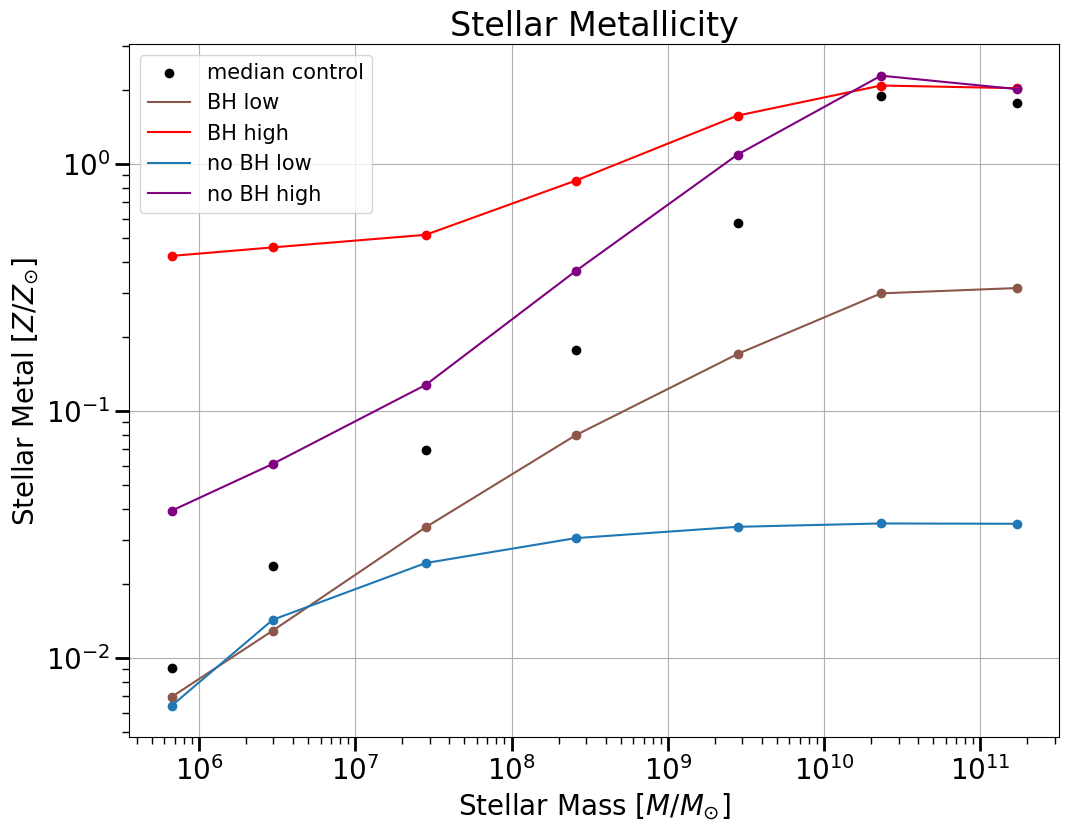

In [53]:
plt.scatter(star_mass_med, stellar_median/solar_metal, label = 'median control', c = 'k')
plt.scatter(star_mass_med, BH_star_med_low/solar_metal, c = 'tab:brown')
plt.scatter(star_mass_med, BH_star_med_high/solar_metal, c = 'red')
plt.scatter(star_mass_med, no_BH_star_med_low/solar_metal, c = 'tab:blue')
plt.scatter(star_mass_med, no_BH_star_med_high/solar_metal, c = 'purple')


plt.plot(star_mass_med, BH_star_med_low/solar_metal, label = 'BH low', c = 'tab:brown')
plt.plot(star_mass_med, BH_star_med_high/solar_metal, label = 'BH high', c = 'red')
plt.plot(star_mass_med, no_BH_star_med_low/solar_metal, label = 'no BH low', c = 'tab:blue')
plt.plot(star_mass_med, no_BH_star_med_high/solar_metal, label = 'no BH high', c = 'purple')

plt.xscale('log')
plt.yscale('log')

plt.legend(loc = 'upper left', fontsize = '15')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('Stellar Metal $[Z/Z_{\odot}]$')
plt.title('Stellar Metallicity')

plt.grid()
#plt.show()
plt.savefig("./Pictures/star_cut_ave.png", bbox_inches='tight')

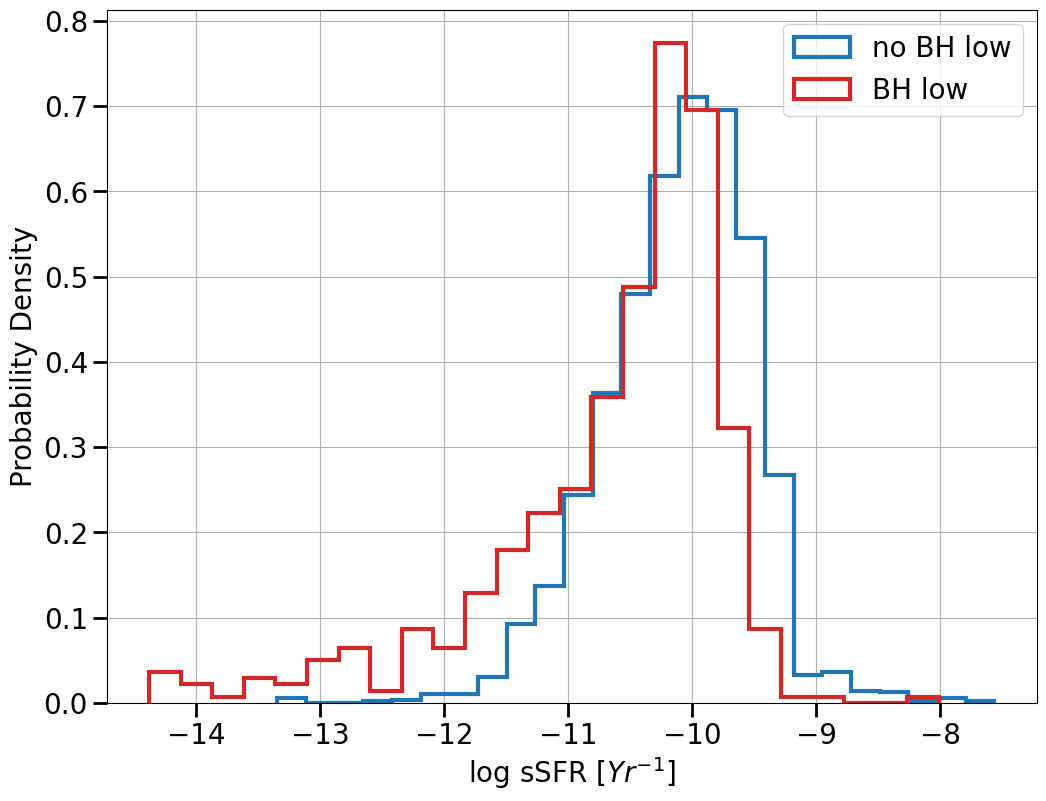

In [54]:
#plt.hist(np.log10(SFR_BH_high/Mstar_BH_high), bins = 25, density = True, histtype = 'step', lw = 3, label = 'BH high')
plt.hist(np.log10(SFR_no_BH_low/Mstar_no_BH_low), bins = 25, density = True, histtype = 'step', lw = 3, label = 'no BH low')
plt.hist(np.log10(SFR_BH_low/Mstar_BH_low), bins = 25, density = True, histtype = 'step', lw = 3, label = 'BH low', color = "tab:red")
#plt.hist(np.log10(SFR_no_BH_high/Mstar_no_BH_high), bins = 25, density = True, histtype = 'step', lw = 3, label = 'no BH high')


plt.ylabel('Probability Density')
plt.xlabel('log sSFR $[Yr^{-1}]$')


plt.grid()
plt.legend()
#plt.show()
plt.savefig("./Pictures/star_sSFR_1.png", bbox_inches='tight')

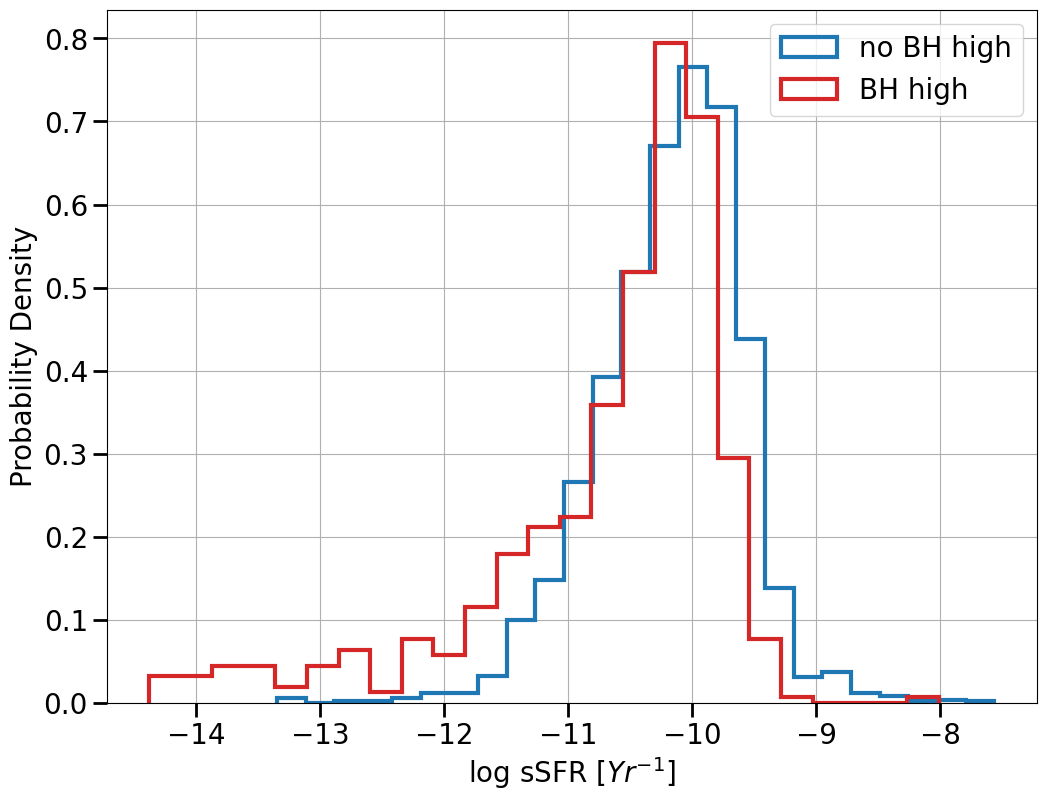

In [55]:
plt.hist(np.log10(SFR_no_BH_high/Mstar_no_BH_high), bins = 25, density = True, histtype = 'step', lw = 3, label = 'no BH high')
plt.hist(np.log10(SFR_BH_high/Mstar_BH_high), bins = 25, density = True, histtype = 'step', lw = 3, label = 'BH high', color = "tab:red")
#plt.hist(np.log10(SFR_no_BH_low/Mstar_no_BH_low), bins = 25, density = True, histtype = 'step', lw = 3, label = 'no BH low')
#plt.hist(np.log10(SFR_BH_low/Mstar_BH_low), bins = 25, density = True, histtype = 'step', lw = 3, label = 'BH low', color = "tab:red")



plt.ylabel('Probability Density')
plt.xlabel('log sSFR $[Yr^{-1}]$')


plt.grid()
plt.legend()
#plt.show()
plt.savefig("./Pictures/star_sSFR_2.png", bbox_inches='tight')

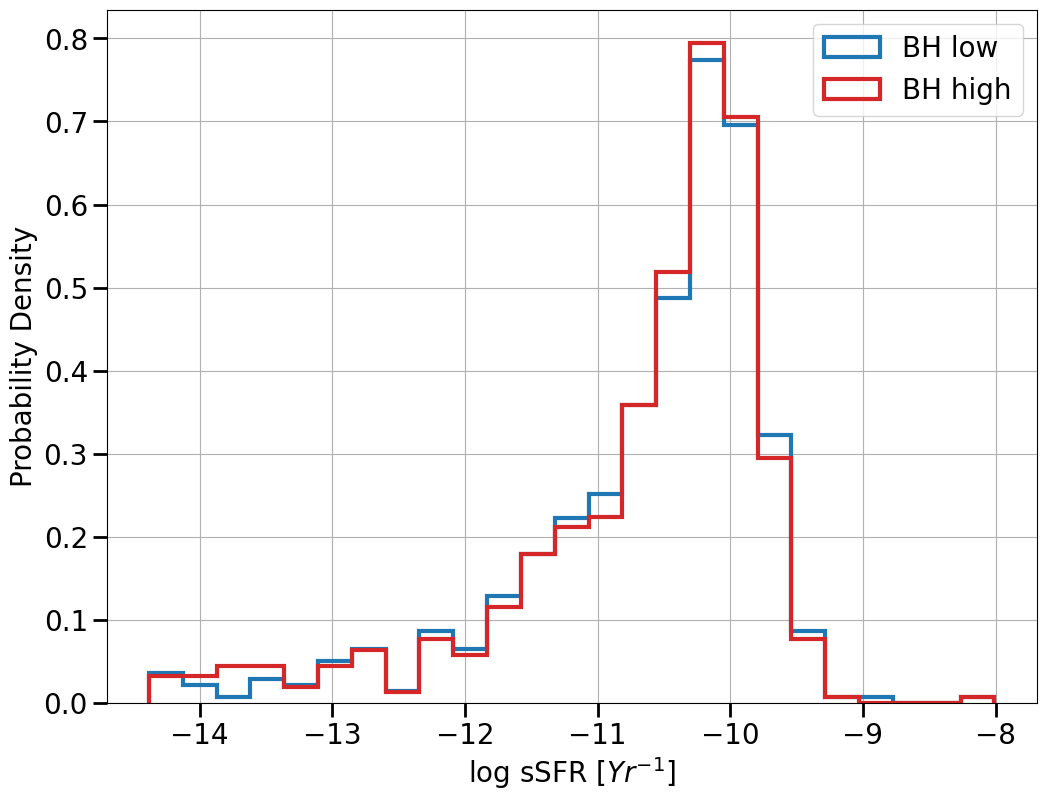

In [56]:
#plt.hist(np.log10(SFR_no_BH_high/Mstar_no_BH_high), bins = 25, density = True, histtype = 'step', lw = 3, label = 'no BH high')
plt.hist(np.log10(SFR_BH_low/Mstar_BH_low), bins = 25, density = True, histtype = 'step', lw = 3, label = 'BH low')
plt.hist(np.log10(SFR_BH_high/Mstar_BH_high), bins = 25, density = True, histtype = 'step', lw = 3, label = 'BH high', color = "tab:red")
#plt.hist(np.log10(SFR_no_BH_low/Mstar_no_BH_low), bins = 25, density = True, histtype = 'step', lw = 3, label = 'no BH low')



plt.ylabel('Probability Density')
plt.xlabel('log sSFR $[Yr^{-1}]$')


plt.grid()
plt.legend()
#plt.show()
plt.savefig("./Pictures/star_sSFR_3.png", bbox_inches='tight')

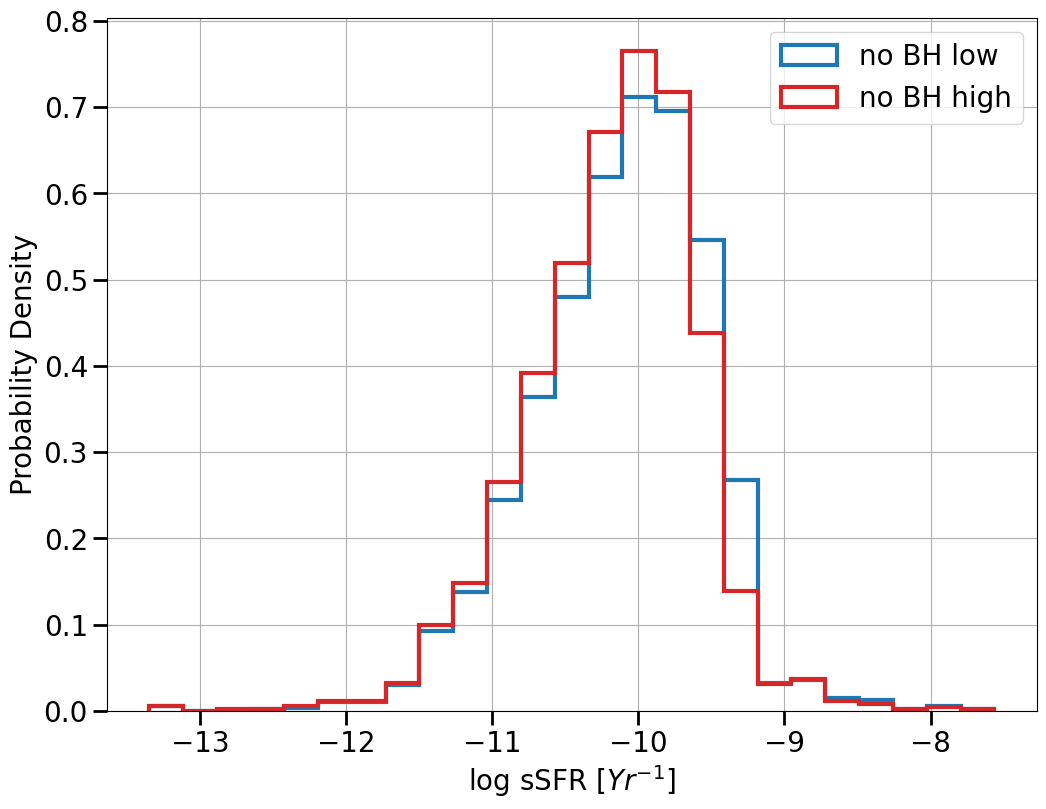

In [57]:
#plt.hist(np.log10(SFR_BH_high/Mstar_BH_high), bins = 25, density = True, histtype = 'step', lw = 3, label = 'BH high')
#plt.hist(np.log10(SFR_BH_low/Mstar_BH_low), bins = 25, density = True, histtype = 'step', lw = 3, label = 'BH low', color = 'tab:red')
plt.hist(np.log10(SFR_no_BH_low/Mstar_no_BH_low), bins = 25, density = True, histtype = 'step', lw = 3, label = 'no BH low')
plt.hist(np.log10(SFR_no_BH_high/Mstar_no_BH_high), bins = 25, density = True, histtype = 'step', lw = 3, label = 'no BH high', color = "tab:red")

plt.ylabel('Probability Density')
plt.xlabel('log sSFR $[Yr^{-1}]$')

plt.grid()
plt.legend()
#plt.show()
plt.savefig("./Pictures/star_sSFR_4.png", bbox_inches='tight')

In [58]:
BH_num_low_10[100]

479

In [59]:
halo = db.get_halo('cosmo25/%8192/479')
halo['Mstar']

970110149.943614

In [60]:
BH_num_high_9[330]

448

In [61]:
halo = db.get_halo('cosmo25/%8192/448')
halo['Mstar']

1385788828.1486351

In [62]:
no_BH_num_low_10[25]

415

In [63]:
halo = db.get_halo('cosmo25/%8192/415')
halo['Mstar']

941898052.1236488

In [64]:
no_BH_num_high_9[100]

467

In [65]:
halo = db.get_halo('cosmo25/%8192/467')
halo['Mstar']

1070132599.2333915

In [66]:
def smooth(arr):
    x = np.convolve(arr, np.ones(10)/10, mode = 'same')
    return x

In [67]:
def get_time(arr):
    dt = sim["histogram_delta_t_Gyr"]
    time_sfr = np.arange(len(arr)) * dt + dt/2.
    
    return time_sfr

In [68]:
halo1 = db.get_halo('cosmo25/%8192/479') # bh low
halo2 = db.get_halo('cosmo25/%8192/448') # bh high
halo3 = db.get_halo('cosmo25/%8192/415') # no bh low
halo4 = db.get_halo('cosmo25/%8192/467') # no bh high

In [69]:
SFR_1 = halo1['SFR_histogram']
SFR_2 = halo2['SFR_histogram']
SFR_3 = halo3['SFR_histogram']
SFR_4 = halo4['SFR_histogram']

In [70]:
SFR_1 = smooth(SFR_1)
SFR_2 = smooth(SFR_2)
SFR_3 = smooth(SFR_3)
SFR_4 = smooth(SFR_4)

In [71]:
time_1 = get_time(SFR_1)
time_2 = get_time(SFR_2)
time_3 = get_time(SFR_3)
time_4 = get_time(SFR_4)

In [72]:
halo1['Mstar']

970110149.943614

In [73]:
halo2['Mstar']

1385788828.1486351

In [74]:
halo3['Mstar']

941898052.1236488

In [75]:
halo4['Mstar']

1070132599.2333915

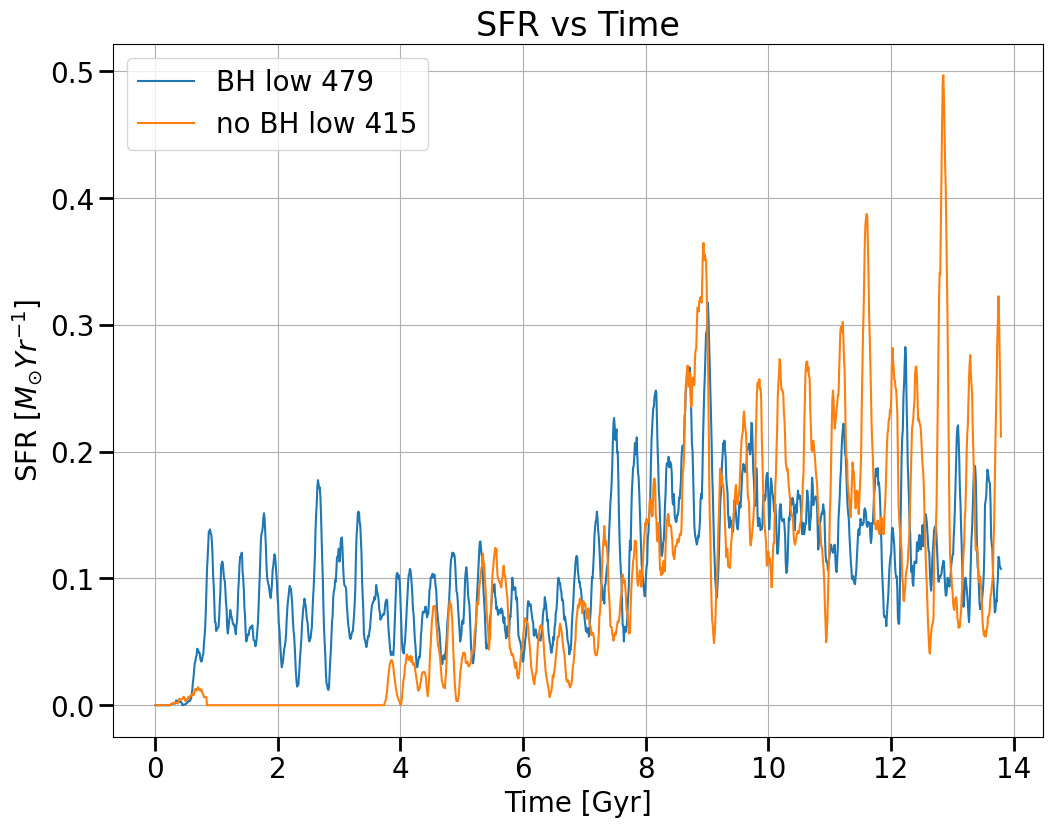

In [76]:
plt.plot(time_1, SFR_1, label = 'BH low 479')
plt.plot(time_3, SFR_3, label = 'no BH low 415')

plt.title('SFR vs Time')
plt.xlabel('Time [Gyr]')
plt.ylabel('SFR $[M_{\odot}Yr^{-1}]$')

plt.legend()
plt.grid()
plt.show()

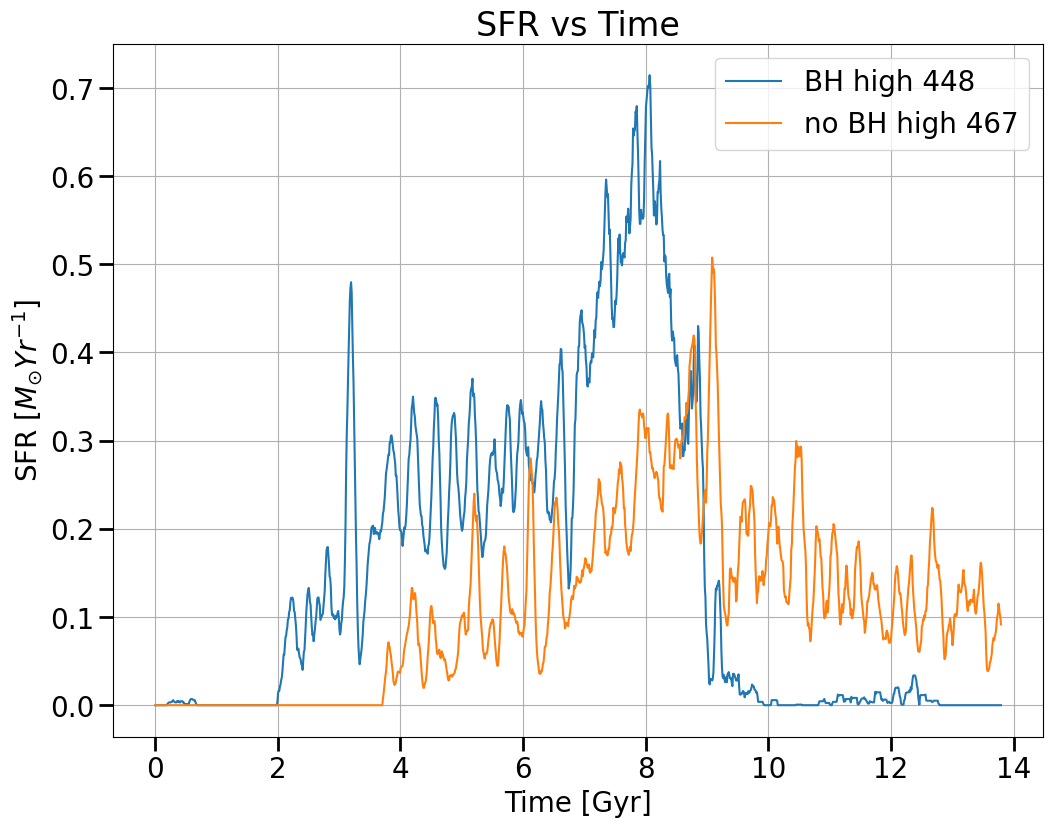

In [77]:
plt.plot(time_2, SFR_2, label = 'BH high 448')
plt.plot(time_4, SFR_4, label = 'no BH high 467')

plt.title('SFR vs Time')
plt.xlabel('Time [Gyr]')
plt.ylabel('SFR $[M_{\odot}Yr^{-1}]$')

plt.legend()
plt.grid()
plt.show()

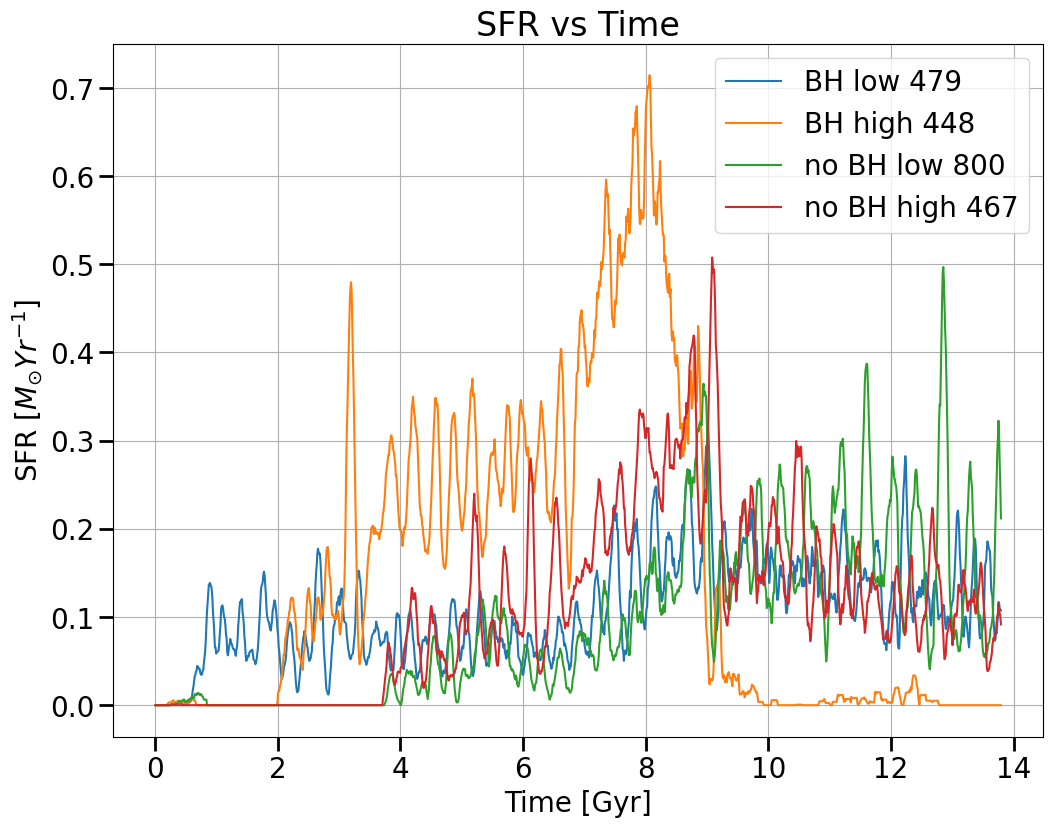

In [78]:
plt.plot(time_1, SFR_1, label = 'BH low 479')
plt.plot(time_2, SFR_2, label = 'BH high 448')
plt.plot(time_3, SFR_3, label = 'no BH low 800')
plt.plot(time_4, SFR_4, label = 'no BH high 467')

plt.title('SFR vs Time')
plt.xlabel('Time [Gyr]')
plt.ylabel('SFR $[M_{\odot}Yr^{-1}]$')

plt.legend()
plt.grid()
plt.show()

In [79]:
stellar_metal_BH_data.keys()

dict_keys(['BH_stellar_mass', 'BH_stellar_metal', 'BH_halo_ind', 'note'])

In [80]:
stellar_metal_BH_data['note']

'stellar mass and stellar metals of halos with BH'

In [81]:
num = np.where(no_BH == 457)
print(num)

(array([95]),)


In [82]:
Mstar_all[457 - 1]

1275634916.62081

In [83]:
no_BH_stellar_metal[95]/solar_metal

0.49673134486118803

In [84]:
stellar_median/solar_metal

array([0.0091412 , 0.02359637, 0.06956811, 0.17627659, 0.57418405,
       1.89058565, 1.76578866])